In [ ]:
# Import batch processing
from src.batch_processing import process_field_campaign

# Define path to field campaign data
data_path = ""

# Process all NetCDF files in the data path
results = process_field_campaign(data_path, limit = 5)

Processing: /net/dropsonde_archive/2024_caesar/qc/ncdf_v1/caesar_ACS_NRD41_v1_RF01-01_20240228T125201.nc
Processing: /net/dropsonde_archive/2024_caesar/qc/ncdf_v1/caesar_ACS_NRD41_v1_RF01-02_20240228T134158.nc
Processing: /net/dropsonde_archive/2024_caesar/qc/ncdf_v1/caesar_ACS_NRD41_v1_RF01-04_20240228T132326.nc
Processing: /net/dropsonde_archive/2024_caesar/qc/ncdf_v1/caesar_ACS_NRD41_v1_RF01-05_20240228T133240.nc
Processing: /net/dropsonde_archive/2024_caesar/qc/ncdf_v1/caesar_ACS_NRD41_v1_RF01-06_20240228T135134.nc


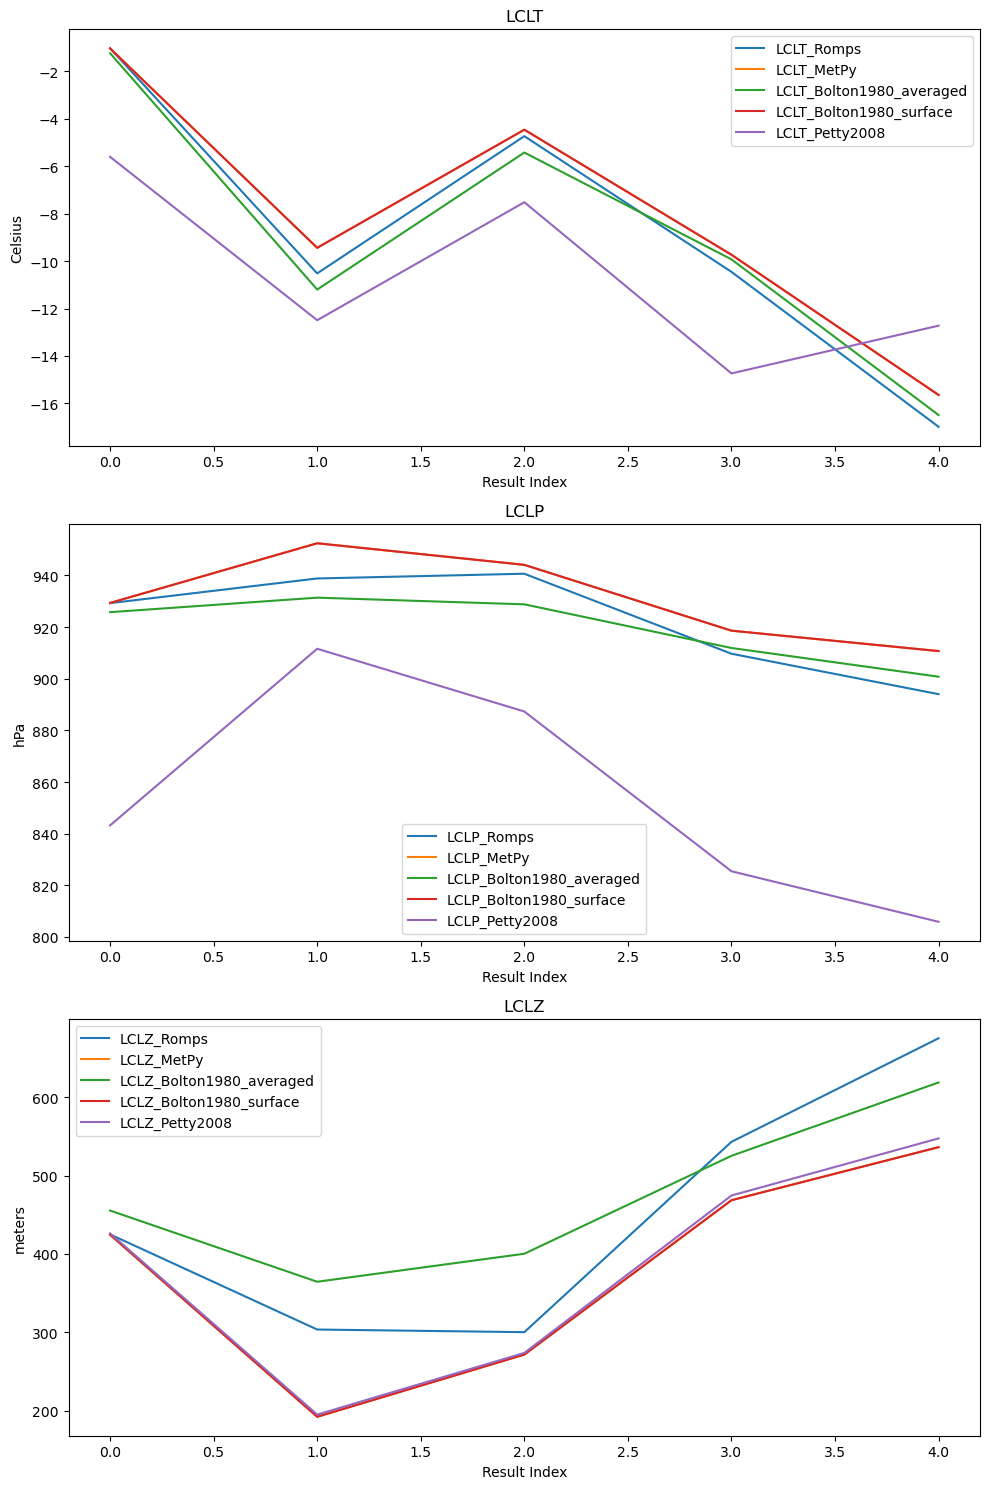

In [2]:
import matplotlib.pyplot as plt

# Define suffixes
# Find suffixes programmatically
suffixes = list(set(k.split('LCLZ')[-1] for ds in results for k in ds.keys() if k.startswith('LCLZ')))

# Extract the variables from the datasets
lclt = {suffix: [ds[f'LCLT{suffix}'].values for ds in results] for suffix in suffixes}
lclp = {suffix: [ds[f'LCLP{suffix}'].values for ds in results] for suffix in suffixes}
lclz = {suffix: [ds[f'LCLZ{suffix}'].values for ds in results] for suffix in suffixes}

# Create a figure and axis objects
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Plot LCLT
for suffix in suffixes:
    axs[0].plot(range(len(results)), lclt[suffix], label=f'LCLT{suffix}')
axs[0].set_title('LCLT')
axs[0].set_xlabel('Result Index')
axs[0].set_ylabel('Celsius')
axs[0].legend()

# Plot LCLP
for suffix in suffixes:
    axs[1].plot(range(len(results)), lclp[suffix], label=f'LCLP{suffix}')
axs[1].set_title('LCLP')
axs[1].set_xlabel('Result Index')
axs[1].set_ylabel('hPa')
axs[1].legend()

# Plot LCLZ
for suffix in suffixes:
    axs[2].plot(range(len(results)), lclz[suffix], label=f'LCLZ{suffix}')
axs[2].set_title('LCLZ')
axs[2].set_xlabel('Result Index')
axs[2].set_ylabel('meters')
axs[2].legend()

# Adjust layout
plt.tight_layout()
plt.show()

In [4]:
for suffix in suffixes:
    print(lclp[suffix])

[array(929.27998867), array(938.83475636), array(940.67035159), array(909.69255338), array(894.02951509)]
[array(929.36221291), array(952.46872678), array(944.11380251), array(918.62016857), array(910.70490385)]
[array(925.78175508), array(931.40477578), array(928.81799283), array(911.91494663), array(900.79412763)]
[array(929.35723041), array(952.46971344), array(944.11195277), array(918.62271852), array(910.71880622)]
[array(843.20877515), array(911.61701086), array(887.31214142), array(825.45409452), array(805.87776227)]
